In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [3]:
data = pd.read_csv("2w.csv")

Features and Target variables

In [4]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# For 3W Uncomment the below line
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','Bus','HCV','LCV','Total']].values

# For HV and LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values

target = data['SD'].values

Normalize data

In [5]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [7]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [8]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)


Epoch 1/800

31/31 [==============================] - 2s 10ms/step - loss: 284.2780 - val_loss: 274.1969
Epoch 2/800
31/31 [==============================] - 0s 5ms/step - loss: 133.8558 - val_loss: 33.4945
Epoch 3/800
31/31 [==============================] - 0s 5ms/step - loss: 30.3352 - val_loss: 28.4397
Epoch 4/800
31/31 [==============================] - 0s 3ms/step - loss: 29.0135 - val_loss: 28.0332
Epoch 5/800
31/31 [==============================] - 0s 4ms/step - loss: 28.7117 - val_loss: 31.4470
Epoch 6/800
31/31 [==============================] - 0s 3ms/step - loss: 28.0988 - val_loss: 26.9436
Epoch 7/800
31/31 [==============================] - 0s 4ms/step - loss: 27.1815 - val_loss: 29.9309
Epoch 8/800
31/31 [==============================] - 0s 3ms/step - loss: 28.6498 - val_loss: 26.8035
Epoch 9/800
31/31 [==============================] - 0s 3ms/step - loss: 28.6571 - val_loss: 28.3302
Epoch 10/800
31/31 [==============================] - 0s 3ms/step - loss: 28.9412 - v

Visualize LSTM results

0.7125765146588361


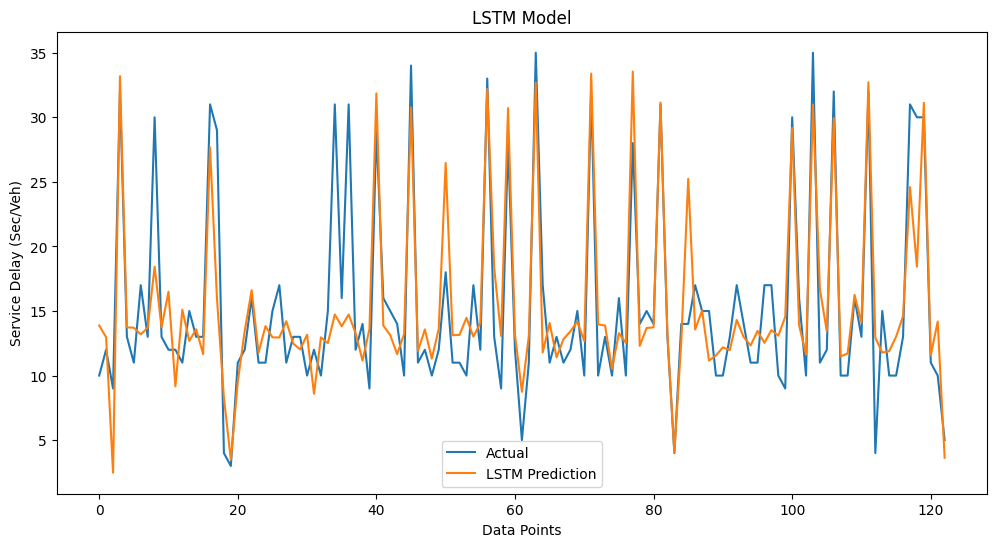

In [9]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [10]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/600
31/31 [==============================] - 4s 19ms/step - loss: 262.8747 - val_loss: 143.5905
Epoch 2/600
31/31 [==============================] - 0s 6ms/step - loss: 52.9308 - val_loss: 26.0262
Epoch 3/600
31/31 [==============================] - 0s 6ms/step - loss: 25.7112 - val_loss: 21.7815
Epoch 4/600
31/31 [==============================] - 0s 6ms/step - loss: 23.1111 - val_loss: 21.4800
Epoch 5/600
31/31 [==============================] - 0s 6ms/step - loss: 23.2073 - val_loss: 22.0792
Epoch 6/600
31/31 [==============================] - 0s 5ms/step - loss: 23.1840 - val_loss: 23.0228
Epoch 7/600
31/31 [==============================] - 0s 6ms/step - loss: 26.6643 - val_loss: 21.8580
Epoch 8/600
31/31 [==============================] - 0s 6ms/step - loss: 23.6054 - val_loss: 22.7672
Epoch 9/600
31/31 [==============================] - 0s 5ms/step - loss: 22.9374 - val_loss: 21.7141
Epoch 10/600
31/31 [==============================] - 0s 5ms/step - loss: 22.5632 - val_

Visualize BiLSTM results

0.7099231134817403


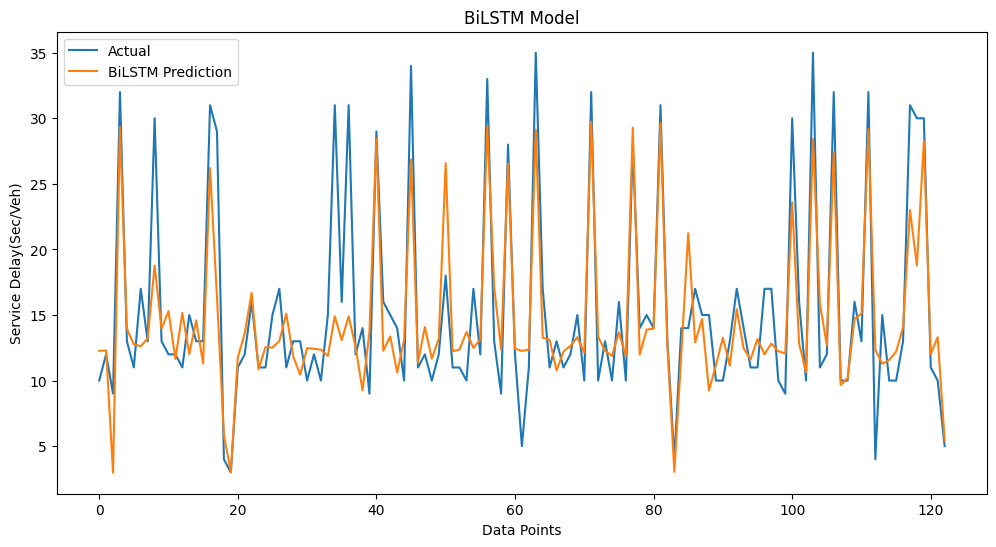

In [11]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [12]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
31/31 [==============================] - 2s 11ms/step - loss: 273.5418 - val_loss: 230.4172
Epoch 2/800
31/31 [==============================] - 0s 4ms/step - loss: 85.7341 - val_loss: 34.5608
Epoch 3/800
31/31 [==============================] - 0s 4ms/step - loss: 27.7878 - val_loss: 27.2506
Epoch 4/800
31/31 [==============================] - 0s 4ms/step - loss: 26.3744 - val_loss: 26.7103
Epoch 5/800
31/31 [==============================] - 0s 4ms/step - loss: 26.4954 - val_loss: 26.2660
Epoch 6/800
31/31 [==============================] - 0s 4ms/step - loss: 26.1209 - val_loss: 25.6036
Epoch 7/800
31/31 [==============================] - 0s 4ms/step - loss: 26.3796 - val_loss: 25.4075
Epoch 8/800
31/31 [==============================] - 0s 4ms/step - loss: 27.6226 - val_loss: 26.5127
Epoch 9/800
31/31 [==============================] - 0s 3ms/step - loss: 25.7516 - val_loss: 28.4811
Epoch 10/800
31/31 [==============================] - 0s 4ms/step - loss: 27.1580 - val_

Visualize GRU results

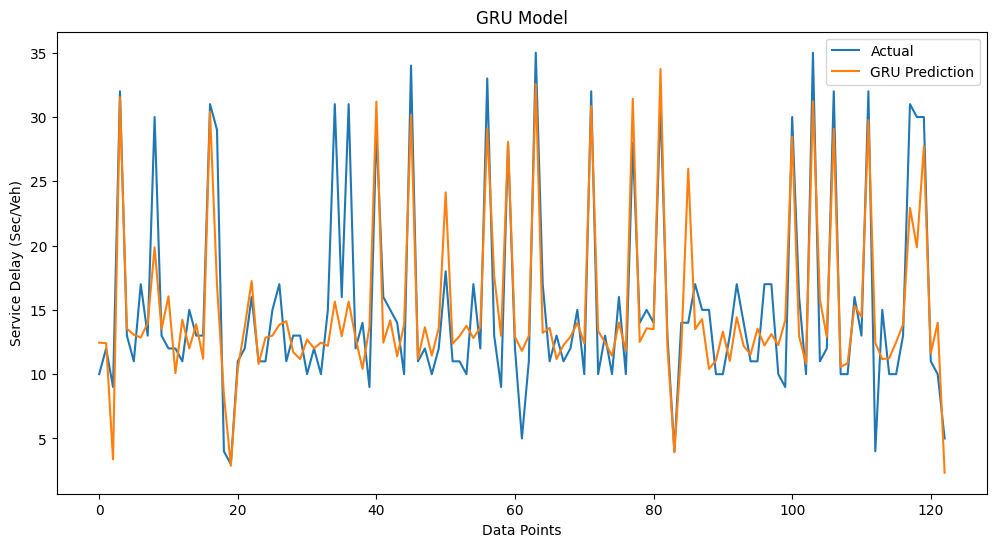

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [14]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/800
31/31 [==============================] - 3s 15ms/step - loss: 255.6676 - val_loss: 149.0626
Epoch 2/800
31/31 [==============================] - 0s 4ms/step - loss: 53.5878 - val_loss: 25.0196
Epoch 3/800
31/31 [==============================] - 0s 4ms/step - loss: 25.1142 - val_loss: 23.8915
Epoch 4/800
31/31 [==============================] - 0s 5ms/step - loss: 24.3493 - val_loss: 22.7378
Epoch 5/800
31/31 [==============================] - 0s 5ms/step - loss: 24.2875 - val_loss: 22.7486
Epoch 6/800
31/31 [==============================] - 0s 5ms/step - loss: 23.1311 - val_loss: 21.8776
Epoch 7/800
31/31 [==============================] - 0s 5ms/step - loss: 23.3727 - val_loss: 21.8582
Epoch 8/800
31/31 [==============================] - 0s 5ms/step - loss: 23.3844 - val_loss: 22.1166
Epoch 9/800
31/31 [==============================] - 0s 4ms/step - loss: 23.6720 - val_loss: 26.2797
Epoch 10/800
31/31 [==============================] - 0s 5ms/step - loss: 23.7481 - val_

Visualize BiGRU results

0.7301813414511296


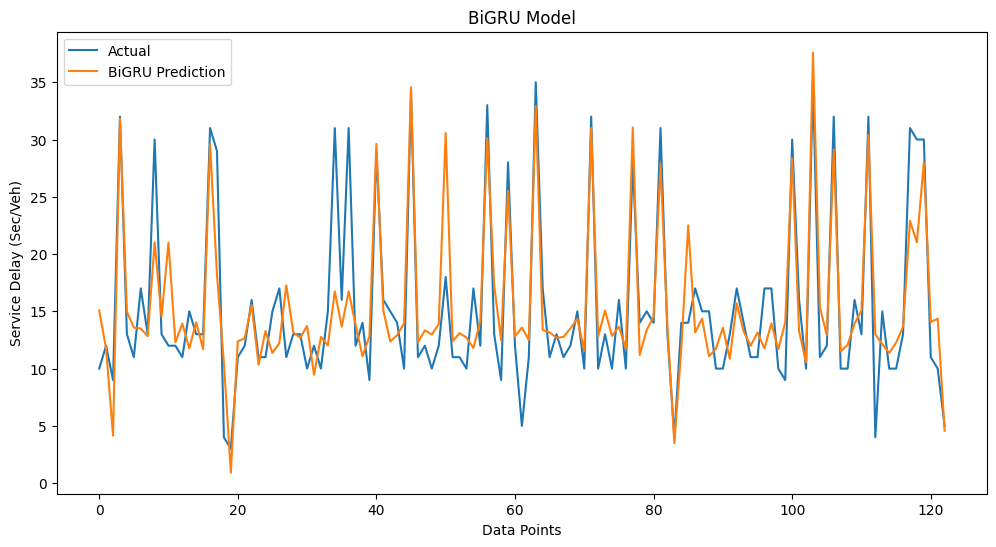

In [15]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [16]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)


Epoch 1/800
31/31 [==============================] - 1s 6ms/step - loss: 262.6197 - val_loss: 217.3249
Epoch 2/800
31/31 [==============================] - 0s 2ms/step - loss: 129.5039 - val_loss: 42.7178
Epoch 3/800
31/31 [==============================] - 0s 2ms/step - loss: 28.0776 - val_loss: 25.7749
Epoch 4/800
31/31 [==============================] - 0s 2ms/step - loss: 25.6415 - val_loss: 25.1894
Epoch 5/800
31/31 [==============================] - 0s 2ms/step - loss: 24.8438 - val_loss: 24.7130
Epoch 6/800
31/31 [==============================] - 0s 2ms/step - loss: 24.8300 - val_loss: 24.3489
Epoch 7/800
31/31 [==============================] - 0s 2ms/step - loss: 24.4732 - val_loss: 24.1795
Epoch 8/800
31/31 [==============================] - 0s 3ms/step - loss: 24.4601 - val_loss: 24.2810
Epoch 9/800
31/31 [==============================] - 0s 2ms/step - loss: 24.3539 - val_loss: 23.8823
Epoch 10/800
31/31 [==============================] - 0s 2ms/step - loss: 24.2250 - val

Visualize CNN results

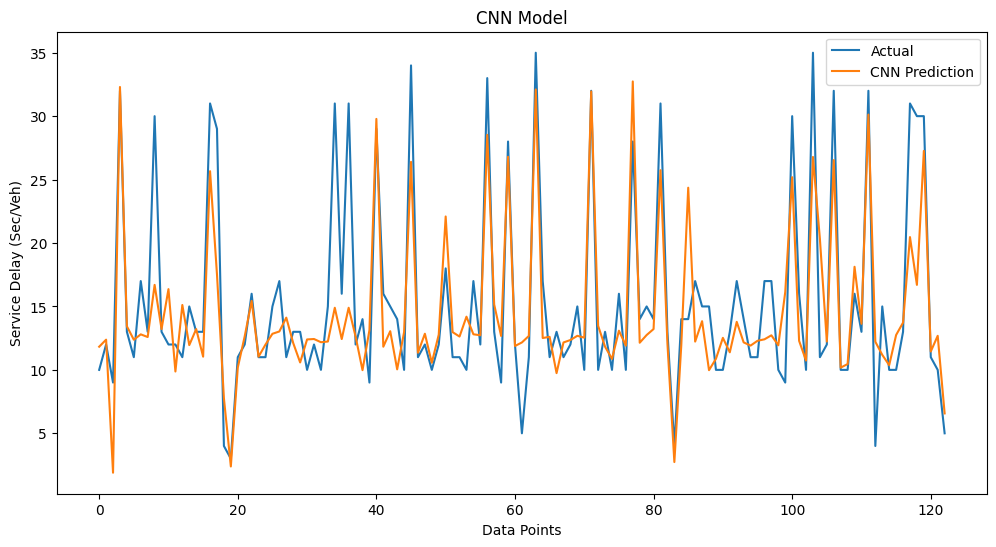

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [18]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
31/31 [==============================] - 1s 7ms/step - loss: 272.4413 - val_loss: 230.6998
Epoch 2/800
31/31 [==============================] - 0s 3ms/step - loss: 98.8089 - val_loss: 29.4334
Epoch 3/800
31/31 [==============================] - 0s 3ms/step - loss: 29.7918 - val_loss: 26.6114
Epoch 4/800
31/31 [==============================] - 0s 3ms/step - loss: 26.7765 - val_loss: 23.3722
Epoch 5/800
31/31 [==============================] - 0s 3ms/step - loss: 24.8417 - val_loss: 22.4746
Epoch 6/800
31/31 [==============================] - 0s 2ms/step - loss: 23.8206 - val_loss: 22.3871
Epoch 7/800
31/31 [==============================] - 0s 3ms/step - loss: 23.7158 - val_loss: 22.1126
Epoch 8/800
31/31 [==============================] - 0s 2ms/step - loss: 23.3528 - val_loss: 22.0550
Epoch 9/800
31/31 [==============================] - 0s 3ms/step - loss: 23.5950 - val_loss: 25.7434
Epoch 10/800
31/31 [==============================] - 0s 3ms/step - loss: 26.5031 - val_l

Visualize CNN_LSTM results

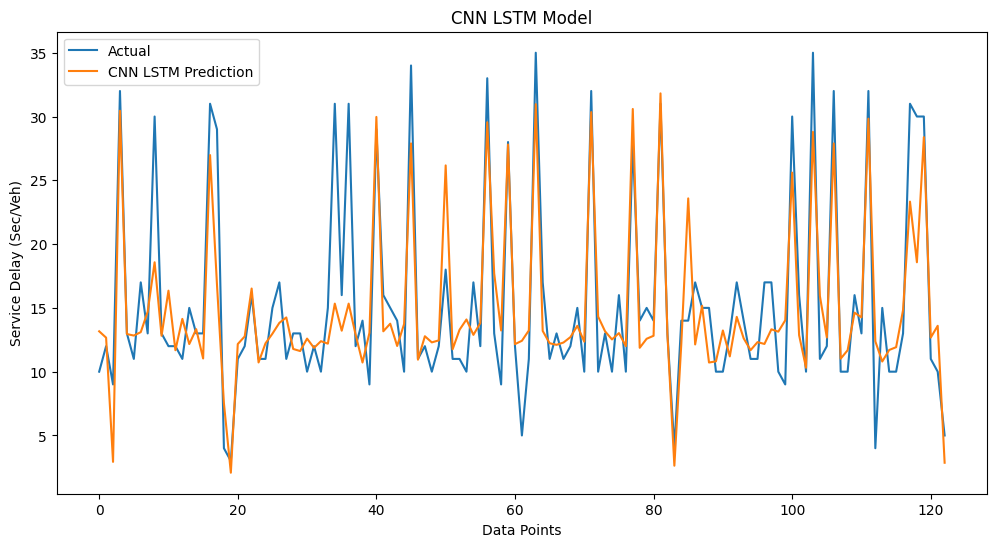

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [20]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
31/31 [==============================] - 1s 9ms/step - loss: 277.8374 - val_loss: 253.9587
Epoch 2/800
31/31 [==============================] - 0s 3ms/step - loss: 127.8042 - val_loss: 36.5297
Epoch 3/800
31/31 [==============================] - 0s 3ms/step - loss: 26.7822 - val_loss: 23.9910
Epoch 4/800
31/31 [==============================] - 0s 3ms/step - loss: 25.5576 - val_loss: 24.7105
Epoch 5/800
31/31 [==============================] - 0s 3ms/step - loss: 25.0624 - val_loss: 22.1344
Epoch 6/800
31/31 [==============================] - 0s 3ms/step - loss: 23.5889 - val_loss: 21.9705
Epoch 7/800
31/31 [==============================] - 0s 3ms/step - loss: 23.7429 - val_loss: 22.5195
Epoch 8/800
31/31 [==============================] - 0s 3ms/step - loss: 23.3958 - val_loss: 22.9003
Epoch 9/800
31/31 [==============================] - 0s 3ms/step - loss: 23.4118 - val_loss: 22.9841
Epoch 10/800
31/31 [==============================] - 0s 3ms/step - loss: 24.1156 - val_

Visualize CNN_BiLSTM results

0.7180346992483402


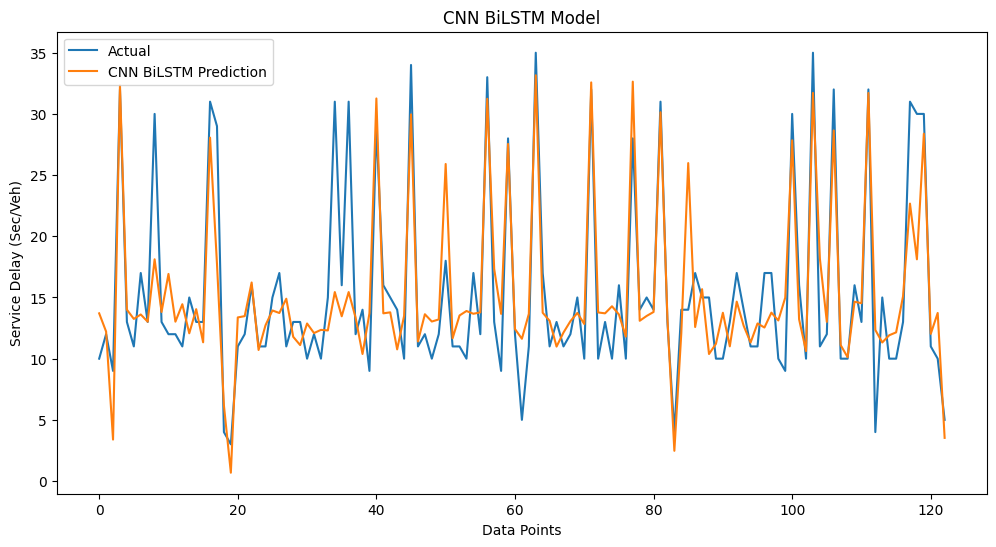

In [21]:
print(r2_cnn_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [22]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

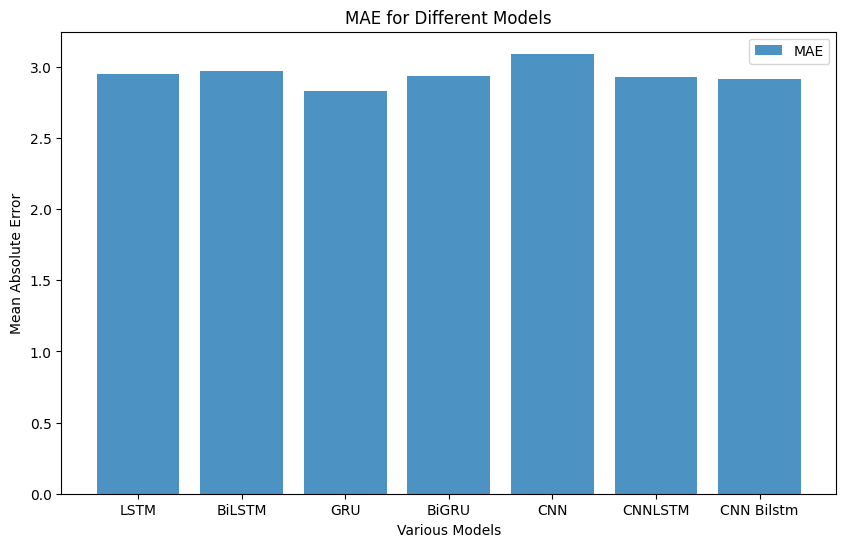

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

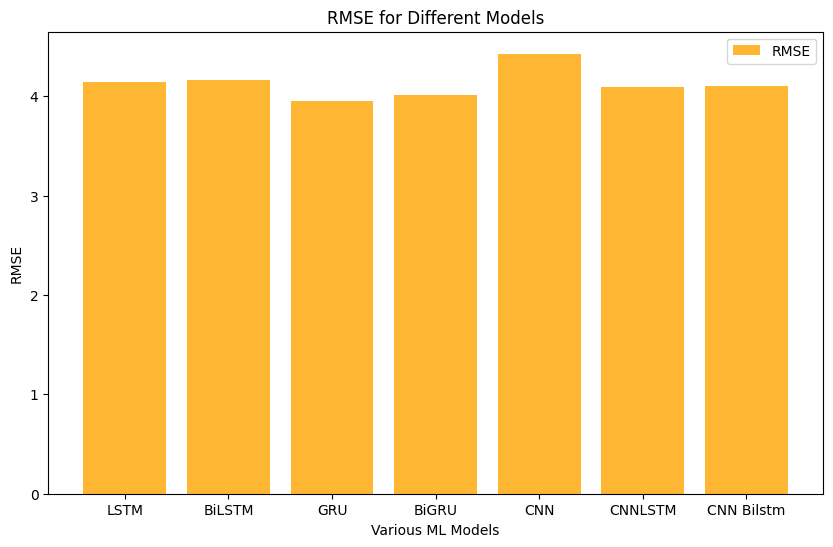

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

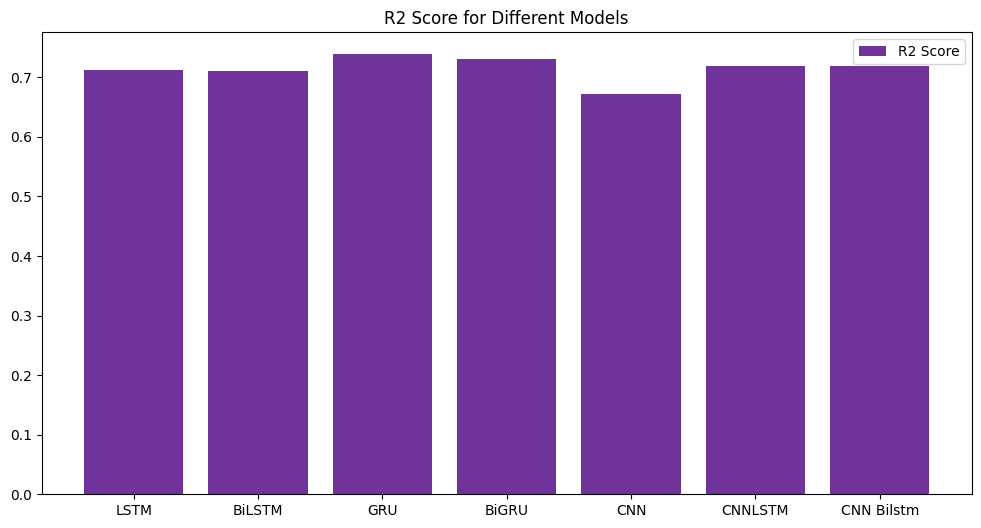

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [26]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 2.9508155303272776
LSTM MSE: 4.139948223163259
LSTM R2 Score: 0.7125765146588361

BiLSTM MAE: 2.9695956862069726
BiLSTM MSE: 4.1590136580227135
BiLSTM R2 Score: 0.7099231134817403

GRU MAE: 2.8300704083791595
GRU MSE: 3.9487286835467295
GRU R2 Score: 0.738514855263362

BiGRU MAE: 2.932475122979017
BiGRU MSE: 4.011158037418441
BiGRU R2 Score: 0.7301813414511296

CNN MAE: 3.0923525114369586
CNN MSE: 4.426953117385603
CNN R2 Score: 0.6713434608883388

CNN LSTM MAE: 2.9283507529313004
CNN LSTM MSE: 4.095910292536883
CNN LSTM R2 Score: 0.7186588199134674

CNN BiLSTM MAE: 2.9166044995067564
CNN BiLSTM MSE: 4.10045091132089
CNN BiLSTM R2 Score: 0.7180346992483402


Plot predictions for each model

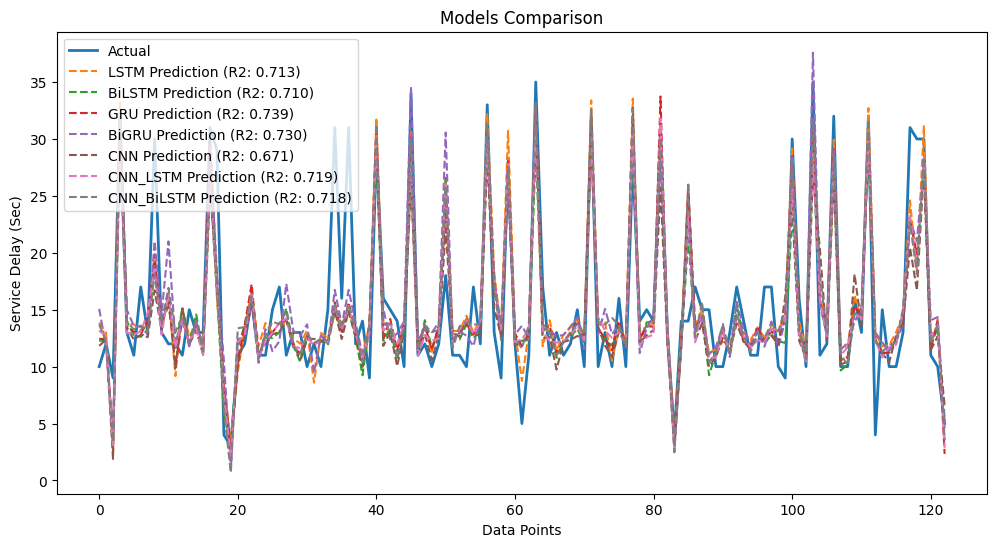

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 4w')
plt.show()

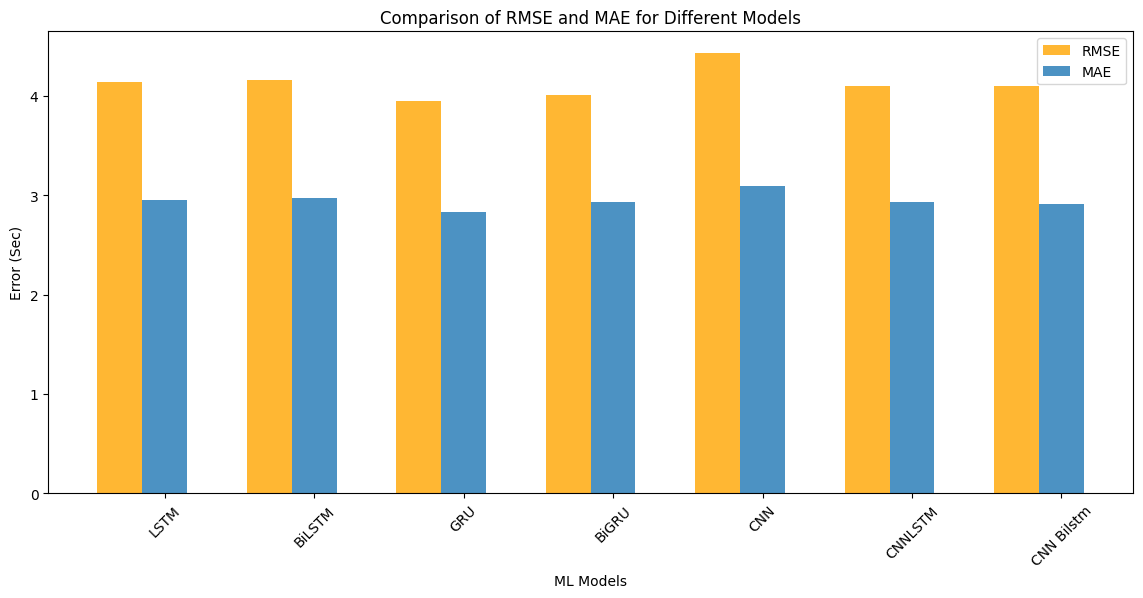

In [28]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 4w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()